In [1]:
import pickle
import gvar as gv
import os
import tomllib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from b2heavy.TwoPointFunctions.types2pts  import CorrelatorIO, Correlator
from b2heavy.TwoPointFunctions.fitter import CorrFitter

In [77]:
def load_toml(file) -> dict:
    with open(file,'rb') as f:
        toml_data: dict = tomllib.load(f)
    return toml_data

In [109]:
name = '/Users/pietro/code/data_analysis/data/QCDNf2p1stag/B2heavy/2024-02-06'

ens      = 'Coarse-1'
meson    = 'Dsst'
mom      = '100'
data_dir = '/Users/pietro/code/data_analysis/BtoD/Alex'
binsize  = 11

In [110]:
config = load_toml('../routines/2pts_fit_config.toml')
smslist = config['fit'][ens][meson]['smlist']
nstates = config['fit'][ens][meson]['nstates']
trange = tuple(config['fit'][ens][meson]['mom'][mom]['trange'])

In [112]:
io = CorrelatorIO(ens,meson,mom,PathToDataDir=data_dir)
corr = Correlator(io,jkBin=binsize)

_,MEFF,AEFF,_,_ = corr.EffectiveCoeff(trange,smearing=smslist)

fitter = CorrFitter(corr,smearing=smslist)
priors = fitter.set_priors_phys(nstates,Meff=MEFF, Aeff=AEFF)
res = fitter.fit(
    Nstates           = nstates,
    trange            = trange,
    verbose           = True,
    pval              = True,
    jkfit             = True,
    priors            = priors,
    scale_covariance  = True,
    shrink_covariance = True
)

fit = fitter.fits[nstates,trange]


---------- 3+3 fit in (14, 23) for mes: Dsst of ens: Coarse-1 for mom: 100 --------------
 De-augmented chi2 = 32.138438338237215 with p-value = 0.11710625676640063
Least Square Fit:
  chi2/dof [dof] = 0.66 [60]    Q = 0.98    logGBF = 1532.1

Parameters:
            E 0   1.15210 (40)      [ 1.15208 (45) ]  
              1     -2.96 (37)      [   -1.66 (57) ]  **
              2     -1.56 (63)      [   -1.1 (1.0) ]  
              3     -1.73 (43)      [   -1.1 (1.0) ]  
              4     -1.40 (79)      [   -1.1 (1.0) ]  
              5     -1.10 (96)      [   -1.1 (1.0) ]  
     Z_1S_Bot 0    0.4665 (58)      [   0.455 (23) ]  
              1     -0.66 (19)      [   -1.2 (1.2) ]  
              2      0.40 (65)      [    0.5 (1.5) ]  
              3      0.3 (1.0)      [    0.5 (1.5) ]  
              4      0.3 (3.0)      [    0.5 (3.0) ]  
              5      0.6 (3.0)      [    0.5 (3.0) ]  
     Z_1S_Par 0    0.4869 (67)      [   0.482 (26) ]  
              1     -0.82 (

(array([ 6., 14., 12.,  8., 16., 13.,  9., 11.,  0.,  1.]),
 array([0.06529036, 0.07615902, 0.08702768, 0.09789633, 0.10876499,
        0.11963365, 0.13050231, 0.14137097, 0.15223962, 0.16310828,
        0.17397694]),
 <BarContainer object of 10 artists>)

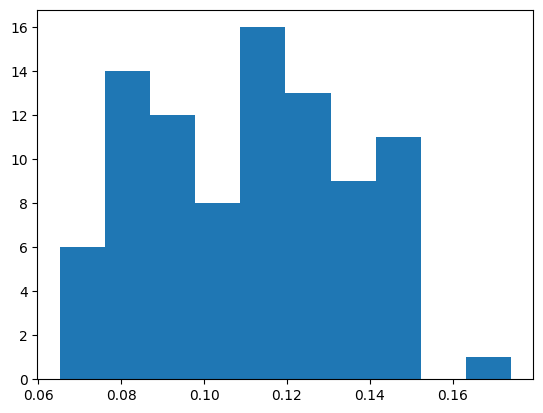

In [116]:
plt.hist(res['pval'])

In [115]:
res

{'pval': array([0.11086041, 0.06914631, 0.14810592, 0.11045838, 0.08652426,
        0.13244986, 0.09545708, 0.11714036, 0.09658698, 0.128277  ,
        0.06529036, 0.0880645 , 0.14134034, 0.12377224, 0.13837957,
        0.1271459 , 0.14170743, 0.17397694, 0.07310475, 0.13942186,
        0.08381316, 0.0748513 , 0.07960922, 0.08912696, 0.08864464,
        0.11204054, 0.11073386, 0.14448473, 0.08724774, 0.12501925,
        0.11820246, 0.14034634, 0.12489455, 0.1147063 , 0.14222297,
        0.12308523, 0.10080544, 0.1201238 , 0.12524671, 0.10725064,
        0.10317888, 0.12157681, 0.09274924, 0.11808838, 0.10958832,
        0.12624909, 0.13442581, 0.08322297, 0.14929281, 0.08537507,
        0.07992957, 0.08486446, 0.14493409, 0.1108351 , 0.09304387,
        0.08679489, 0.08459806, 0.14686163, 0.15081974, 0.11975828,
        0.1077769 , 0.08231019, 0.117641  , 0.09046899, 0.10329837,
        0.1004901 , 0.09603636, 0.10138725, 0.14310142, 0.13446414,
        0.07226904, 0.12347232, 0.102194

In [4]:
root = '/Users/pietro/code/data_analysis/data/QCDNf2p1stag/B2heavy/2024-02-06/fit2pt_config_jk_Coarse-1_Dsst_100_fit.pickle'

In [5]:
with open(root,'rb') as f:
    jkfit = pickle.load(f)

(array([ 6., 14., 12.,  8., 16., 13.,  9., 11.,  0.,  1.]),
 array([0.06529036, 0.07615902, 0.08702768, 0.09789633, 0.10876499,
        0.11963365, 0.13050231, 0.14137097, 0.15223962, 0.16310828,
        0.17397694]),
 <BarContainer object of 10 artists>)

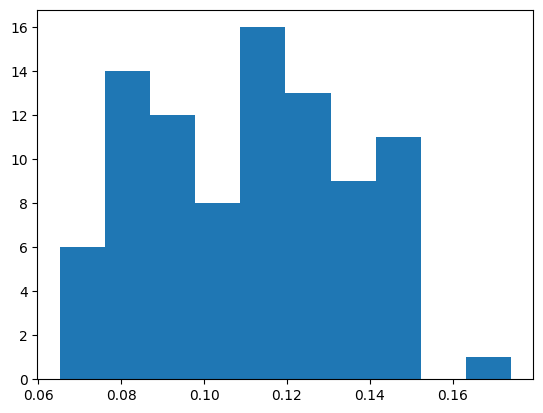

In [11]:
plt.hist(jkfit['pval'])